In [ ]:
from google.colab import files
files.upload()

Saving Regression_data.csv to Regression_data.csv


{'Regression_data.csv': b'Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings\r\nM,0.455,0.365,0.095,0.514,0.2245,0.101,0.15,15\r\nM,0.35,0.265,0.09,0.2255,0.0995,0.0485,0.07,7\r\nF,0.53,0.42,0.135,0.677,0.2565,0.1415,0.21,9\r\nM,0.44,0.365,0.125,0.516,0.2155,0.114,0.155,10\r\nI,0.33,0.255,0.08,0.205,0.0895,0.0395,0.055,7\r\nI,0.425,0.3,0.095,0.3515,0.141,0.0775,0.12,8\r\nF,0.53,0.415,0.15,0.7775,0.237,0.1415,0.33,20\r\nF,0.545,0.425,0.125,0.768,0.294,0.1495,0.26,16\r\nM,0.475,0.37,0.125,0.5095,0.2165,0.1125,0.165,9\r\nF,0.55,0.44,0.15,0.8945,0.3145,0.151,0.32,19\r\nF,0.525,0.38,0.14,0.6065,0.194,0.1475,0.21,14\r\nM,0.43,0.35,0.11,0.406,0.1675,0.081,0.135,10\r\nM,0.49,0.38,0.135,0.5415,0.2175,0.095,0.19,11\r\nF,0.535,0.405,0.145,0.6845,0.2725,0.171,0.205,10\r\nF,0.47,0.355,0.1,0.4755,0.1675,0.0805,0.185,10\r\nM,0.5,0.4,0.13,0.6645,0.258,0.133,0.24,12\r\nI,0.355,0.28,0.085,0.2905,0.095,0.0395,0.115,7\r\nF,0.44,0.34,0.1,0.451,0.188,0.087,0.13,10\r\nM,

In [ ]:
import pandas as pd 
df = pd.read_csv('Regression_data.csv')
df=pd.get_dummies(df,columns=['Sex'])
df

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Sex_F,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,1,0,0
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,0,0,1
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,0,0,1
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,1,0,0


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
def load_dataset(csv_path, TRAIN_RATIO=0.8):
    
    global X, y, X_train, X_test, y_train, y_test, df
    
    # 데이터셋 로드
    df = pd.read_csv(csv_path)
    
    # 성별 원핫 인코딩
    df=pd.get_dummies(df,columns=['Sex'])
    
    # 학습 데이터 분리
    X = df.drop('Rings', axis=1)
    y = df['Rings']
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=TRAIN_RATIO, random_state = 83)
    y_train = y_train.astype('float32')
    y_test = y_test.astype('float32')
    return X_train, X_test, y_train, y_test

csv_path = 'Regression_data.csv'
X_train, X_test, y_train, y_test = load_dataset(csv_path)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(3341, 10) (836, 10) (3341,) (836,)


In [ ]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Sex_F,Sex_I,Sex_M
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684,0.312904,0.321283,0.365813
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169,0.463731,0.467025,0.481715
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000,0.000000,0.000000,0.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000,0.000000,0.000000,0.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000,0.000000,0.000000,0.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000,1.000000,1.000000,1.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000,1.000000,1.000000,1.000000


In [ ]:
# 사용자 정의 평가 지표 클래스
import tensorflow as tf

class EvalAccuracy(tf.keras.metrics.Metric): # TensorFlow의 Metric 클래스를 상속 받음

    def __init__(self, name="eval_accuracy", **kwargs): # 부모 클래스의 __init__() 메소드를 호출하여 필요한 초기화를 수행
        super(EvalAccuracy, self).__init__(name=name, **kwargs)
        self.correct = self.add_weight(name="ctp", initializer="zeros")
        # add_weight() 메소드를 사용하여 평가 지표를 계산하는데 필요한 변수를 생성(각 배치에서의 평가 결과를 누적하기 위해)
        # add_weight() 는 텐서플로우 Layer 클래스의 메서드(새로운 가중치를 추가하는 기능, 여기서는 평가 지표를 계산하는 데 사용되는 일종의 내부 변수를 의미)
        # 이 구문이 실행되면, EvalAccuracy 인스턴스는 새로운 가중치를 추가하고 그 가중치를 self.correct에 저장한다.
        # 이 self.correct는 update_state() 메서드에서 업데이트되며, '현재까지 처리한 모든 배치에 대한 평가 지표의 평균을 저장'한다.

    def update_state(self, y_true, y_predict, sample_weight=None):
        value = tf.abs((y_predict - y_true) / y_true)
        self.correct.assign(tf.reduce_mean(value)) # 오차율을 계산해서 correct 변수에 누적한 후, assign() 메소드를 사용하여 correct 변수의 값을 업데이트

    def result(self):
        return 1 - self.correct

    def reset_states(self):
        # 에포크마다 평가 지표 초기화
        self.correct.assign(0.)

In [ ]:
import tensorflow as tf
# 베이스모델
import numpy as np

def Base_Model(LEARNING_RATE=0.01):
    
    np.random.seed(42)
    tf.random.set_seed(42)
    
    global X, y, X_train, X_test, y_train, y_test, df
    
    y_train = y_train.astype('float32')
    y_test = y_test.astype('float32')
    
    model = tf.keras.Sequential([
            tf.keras.layers.Dense(units=128, activation='relu', input_shape=(len(X_train.keys()),)),
            tf.keras.layers.Dense(units=64, activation='relu'),
            tf.keras.layers.Dense(units=1)
        ])
    
    # 옵티마이저와 손실 함수 설정
    optimizer = tf.keras.optimizers.SGD(learning_rate=LEARNING_RATE) # SGD : 경사하강법을 기본적으로 사용하는 옵티마이저
    model.compile(loss='mean_squared_error',
                  optimizer=optimizer,
                  metrics=[EvalAccuracy()])
    
    return model

model = Base_Model()
model.summary()

Model: "sequential_36"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_108 (Dense)           (None, 128)               1408      
                                                                 
 dense_109 (Dense)           (None, 64)                8256      
                                                                 
 dense_110 (Dense)           (None, 1)                 65        
                                                                 
Total params: 9,729
Trainable params: 9,729
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 하이퍼파라미터 세팅
LEARNING_RATE = 0.01
EPOCHS = 100
MB_SIZE = 100
REPORT = 1
TRAIN_RATIO = 0.8

history = model.fit(
  X_train, y_train,
  batch_size=MB_SIZE,
  validation_split = 0.2,
  verbose=1,
  epochs=EPOCHS)

Epoch 1/100
27/27 [==============================] - 1s 14ms/step - loss: 17.8851 - eval_accuracy: 0.8773 - val_loss: 6.7426 - val_eval_accuracy: 0.8249
Epoch 2/100
 1/27 [>.............................] - ETA: 0s - loss: 5.0020 - eval_accuracy: 0.8286

/usr/local/lib/python3.10/dist-packages/keras/engine/training.py:2448: UserWarning: Metric EvalAccuracy implements a `reset_states()` method; rename it to `reset_state()` (without the final "s"). The name `reset_states()` has been deprecated to improve API consistency.
  m.reset_state()


27/27 [==============================] - 0s 5ms/step - loss: 7.5287 - eval_accuracy: 0.7345 - val_loss: 7.7304 - val_eval_accuracy: 0.8382
Epoch 3/100
27/27 [==============================] - 0s 5ms/step - loss: 7.4836 - eval_accuracy: 0.8264 - val_loss: 7.2966 - val_eval_accuracy: 0.7626
Epoch 4/100
27/27 [==============================] - 0s 5ms/step - loss: 7.3395 - eval_accuracy: 0.7658 - val_loss: 7.4794 - val_eval_accuracy: 0.8397
Epoch 5/100
27/27 [==============================] - 0s 5ms/step - loss: 7.2744 - eval_accuracy: 0.7650 - val_loss: 6.1380 - val_eval_accuracy: 0.8343
Epoch 6/100
27/27 [==============================] - 0s 5ms/step - loss: 6.9480 - eval_accuracy: 0.7598 - val_loss: 7.3573 - val_eval_accuracy: 0.8412
Epoch 7/100
27/27 [==============================] - 0s 5ms/step - loss: 7.3521 - eval_accuracy: 0.7630 - val_loss: 8.2501 - val_eval_accuracy: 0.8346
Epoch 8/100
27/27 [==============================] - 0s 3ms/step - loss: 6.6934 - eval_accuracy: 0.7771 - 

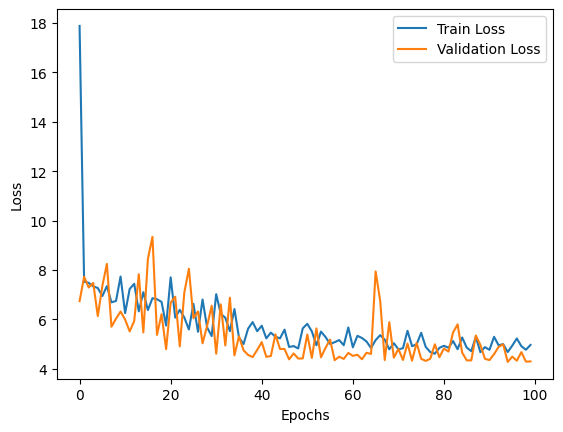

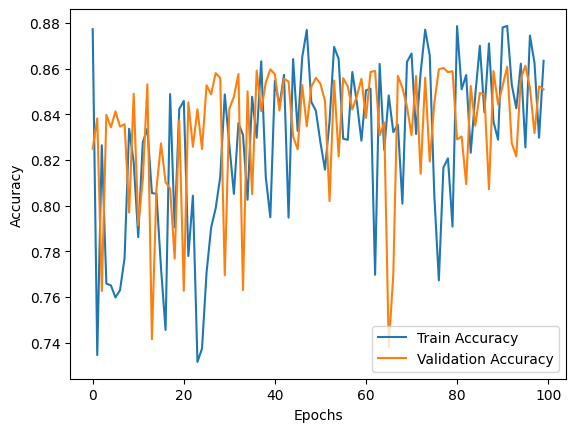

27/27 [==============================] - 0s 2ms/step - loss: 4.2750 - eval_accuracy: 0.6973
Test Loss: 4.275
Test Accuracy: 0.697


/usr/local/lib/python3.10/dist-packages/keras/engine/training.py:2448: UserWarning: Metric EvalAccuracy implements a `reset_states()` method; rename it to `reset_state()` (without the final "s"). The name `reset_states()` has been deprecated to improve API consistency.
  m.reset_state()


In [ ]:
import matplotlib.pyplot as plt

# 손실 그래프
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# 훈련 및 검증 평가 지표 추출
train_accuracy = history.history['eval_accuracy']
val_accuracy = history.history['val_eval_accuracy']

# 평가 지표 그래프 그리기
plt.plot(train_accuracy, label='Train Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# 테스트 세트 평가
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", round(loss, 3))
print("Test Accuracy:", round(accuracy, 3))

In [ ]:
# 적응형 옵티마이저
optimizer_list = ['Adam','RMSprop','Adadelta','Nadam','Adamax']



In [ ]:
# base에서 적응형 옵티마이저로 바꿧을때 
for i in range (len(optimizer_list)):
  def Base_Model(LEARNING_RATE=0.01):
    
    np.random.seed(42)
    tf.random.set_seed(42)
    
    global X, y, X_train, X_test, y_train, y_test, df
    
    y_train = y_train.astype('float32')
    y_test = y_test.astype('float32')
    
    model = tf.keras.Sequential([
            tf.keras.layers.Dense(units=128, activation='relu', input_shape=(len(X_train.keys()),)),
            tf.keras.layers.Dense(units=64, activation='relu'),
            tf.keras.layers.Dense(units=1)
        ])
    
    # 옵티마이저와 손실 함수 설정
    optimizer = getattr(tf.keras.optimizers, optimizer_list[i])(learning_rate=LEARNING_RATE) # SGD : 경사하강법을 기본적으로 사용하는 옵티마이저
    model.compile(loss='mean_squared_error',
                  optimizer=optimizer,
                  metrics=[EvalAccuracy()])
    
    return model

  model = Base_Model()
  LEARNING_RATE = 0.01
  EPOCHS = 100
  MB_SIZE = 100
  REPORT = 1
  TRAIN_RATIO = 0.8

  history = model.fit(
    X_train, y_train,
    batch_size=MB_SIZE,
    validation_split = 0.2,
    verbose=0,
    epochs=EPOCHS)
  print(optimizer_list[i])
  loss, accuracy = model.evaluate(X_test, y_test)

                                                         
 optimizer     \            loss         \   accuracy     



---


기본형(SGD)      \ 4.275         \   0.697    

Adam              \4.2732       \    0.7742             

RMSprop         \ 4.2237         \   0.8181

Adadelta     \    5.6804        \     0.5948

Nadam        \   4.2557        \    0.8109

Adamax       \    4.3450       \     0.7677

Adadelta    \     5.8833     \      0.5923

 

In [ ]:
# 적응형 옵티마이저에서 lr 0.001설정
for i in range (len(optimizer_list)):
  def Base_Model(LEARNING_RATE=0.001):
    
    np.random.seed(42)
    tf.random.set_seed(42)
    
    global X, y, X_train, X_test, y_train, y_test, df
    
    y_train = y_train.astype('float32')
    y_test = y_test.astype('float32')
    
    model = tf.keras.Sequential([
            tf.keras.layers.Dense(units=128, activation='relu', input_shape=(len(X_train.keys()),)),
            tf.keras.layers.Dense(units=64, activation='relu'),
            tf.keras.layers.Dense(units=1)
        ])
    
    # 옵티마이저와 손실 함수 설정
    optimizer = getattr(tf.keras.optimizers, optimizer_list[i])(learning_rate=LEARNING_RATE) # SGD : 경사하강법을 기본적으로 사용하는 옵티마이저
    model.compile(loss='mean_squared_error',
                  optimizer=optimizer,
                  metrics=[EvalAccuracy()])
    
    return model

  model = Base_Model()
  LEARNING_RATE = 0.001
  EPOCHS = 100
  MB_SIZE = 100
  REPORT = 1
  TRAIN_RATIO = 0.8
  np.random.seed(42)
  tf.random.set_seed(42)
  
  history = model.fit(
    X_train, y_train,
    batch_size=MB_SIZE,
    validation_split = 0.2,
    verbose=0,
    epochs=EPOCHS)
  print(optimizer_list[i])
  loss, accuracy = model.evaluate(X_test, y_test)

In [ ]:
def Base_Model(LEARNING_RATE=0.001):
    
    np.random.seed(42)
    tf.random.set_seed(42)
    
    global X, y, X_train, X_test, y_train, y_test, df
    
    y_train = y_train.astype('float32')
    y_test = y_test.astype('float32')
    
    model = tf.keras.Sequential([
            tf.keras.layers.Dense(units=128, activation='relu', input_shape=(len(X_train.keys()),)),
            tf.keras.layers.Dense(units=64, activation='relu'),
            tf.keras.layers.Dense(units=1)
        ])
    
    # 옵티마이저와 손실 함수 설정
    optimizer = tf.keras.optimizers.SGD(learning_rate=LEARNING_RATE) # SGD : 경사하강법을 기본적으로 사용하는 옵티마이저
    model.compile(loss='mean_squared_error',
                  optimizer=optimizer,
                  metrics=[EvalAccuracy()])
    
    return model

model = Base_Model()
LEARNING_RATE = 0.001
EPOCHS = 100
MB_SIZE = 100
REPORT = 1
TRAIN_RATIO = 0.8

history = model.fit(
  X_train, y_train,
  batch_size=MB_SIZE,
  validation_split = 0.2,
  verbose=0,
  epochs=EPOCHS)
loss, accuracy = model.evaluate(X_test, y_test)

                                                         
 optimizer     \            loss         \   accuracy     



---


기본형(SGD)      \ 4.8499         \   0.6320    

Adam              \4.2662      \    0.8605             

RMSprop         \ 4.2248        \   0.8389

Adadelta     \    83.5487        \     0.1540

Nadam        \   4.2014       \    0.8200

Adamax       \    4.3496     \     0.8872

Adadelta    \     88.2131     \      0.1175


In [ ]:
# 적응형 옵티마이저에서 epoch 1000 설정 
for i in range (len(optimizer_list)):
  def Base_Model(LEARNING_RATE=0.01):
    
    np.random.seed(42)
    tf.random.set_seed(42)
    
    global X, y, X_train, X_test, y_train, y_test, df
    
    y_train = y_train.astype('float32')
    y_test = y_test.astype('float32')
    
    model = tf.keras.Sequential([
            tf.keras.layers.Dense(units=128, activation='relu', input_shape=(len(X_train.keys()),)),
            tf.keras.layers.Dense(units=64, activation='relu'),
            tf.keras.layers.Dense(units=1)
        ])
    
    # 옵티마이저와 손실 함수 설정
    optimizer = getattr(tf.keras.optimizers, optimizer_list[i])(learning_rate=LEARNING_RATE) # SGD : 경사하강법을 기본적으로 사용하는 옵티마이저
    model.compile(loss='mean_squared_error',
                  optimizer=optimizer,
                  metrics=[EvalAccuracy()])
    
    return model

  model = Base_Model()
  LEARNING_RATE = 0.01
  EPOCHS = 1000
  MB_SIZE = 100
  REPORT = 1
  TRAIN_RATIO = 0.8

  history = model.fit(
    X_train, y_train,
    batch_size=MB_SIZE,
    validation_split = 0.2,
    verbose=0,
    epochs=EPOCHS)
  print(optimizer_list[i])
  loss, accuracy = model.evaluate(X_test, y_test)

In [ ]:
def Base_Model(LEARNING_RATE=0.01):
    
    np.random.seed(42)
    tf.random.set_seed(42)
    
    global X, y, X_train, X_test, y_train, y_test, df
    
    y_train = y_train.astype('float32')
    y_test = y_test.astype('float32')
    
    model = tf.keras.Sequential([
            tf.keras.layers.Dense(units=128, activation='relu', input_shape=(len(X_train.keys()),)),
            tf.keras.layers.Dense(units=64, activation='relu'),
            tf.keras.layers.Dense(units=1)
        ])
    
    # 옵티마이저와 손실 함수 설정
    optimizer = tf.keras.optimizers.SGD(learning_rate=LEARNING_RATE) # SGD : 경사하강법을 기본적으로 사용하는 옵티마이저
    model.compile(loss='mean_squared_error',
                  optimizer=optimizer,
                  metrics=[EvalAccuracy()])
    
    return model

model = Base_Model()
LEARNING_RATE = 0.01
EPOCHS = 1000
MB_SIZE = 100
REPORT = 1
TRAIN_RATIO = 0.8

history = model.fit(
  X_train, y_train,
  batch_size=MB_SIZE,
  validation_split = 0.2,
  verbose=0,
  epochs=EPOCHS)
loss, accuracy = model.evaluate(X_test, y_test)

                                                         
 optimizer     \            loss         \   accuracy     



---


기본형(SGD)      \ 4.2778         \   0.8090    

Adam              \4.5462      \    0.7970             

RMSprop         \ 4.2926        \   0.7997

Adadelta     \    4.4655        \     0.6906

Nadam        \   4.3899      \    0.8121

Adamax       \    4.7902    \     0.8082

Adadelta    \     4.4999     \      0.6827

In [ ]:
# 적응형 옵티마이저에서 epoch 1000, LR 0.001 설정 
for i in range (len(optimizer_list)):
  def Base_Model(LEARNING_RATE=0.001):
    
    np.random.seed(42)
    tf.random.set_seed(42)
    
    global X, y, X_train, X_test, y_train, y_test, df
    
    y_train = y_train.astype('float32')
    y_test = y_test.astype('float32')
    
    model = tf.keras.Sequential([
            tf.keras.layers.Dense(units=128, activation='relu', input_shape=(len(X_train.keys()),)),
            tf.keras.layers.Dense(units=64, activation='relu'),
            tf.keras.layers.Dense(units=1)
        ])
    
    # 옵티마이저와 손실 함수 설정
    optimizer = getattr(tf.keras.optimizers, optimizer_list[i])(learning_rate=LEARNING_RATE) # SGD : 경사하강법을 기본적으로 사용하는 옵티마이저
    model.compile(loss='mean_squared_error',
                  optimizer=optimizer,
                  metrics=[EvalAccuracy()])
    
    return model

  model = Base_Model()
  LEARNING_RATE = 0.001
  EPOCHS = 1000
  MB_SIZE = 100
  REPORT = 1
  TRAIN_RATIO = 0.8

  history = model.fit(
    X_train, y_train,
    batch_size=MB_SIZE,
    validation_split = 0.2,
    verbose=0,
    epochs=EPOCHS)
  print(optimizer_list[i])
  loss, accuracy = model.evaluate(X_test, y_test)

In [ ]:
def Base_Model(LEARNING_RATE=0.001):
    
    np.random.seed(42)
    tf.random.set_seed(42)
    
    global X, y, X_train, X_test, y_train, y_test, df
    
    y_train = y_train.astype('float32')
    y_test = y_test.astype('float32')
    
    model = tf.keras.Sequential([
            tf.keras.layers.Dense(units=128, activation='relu', input_shape=(len(X_train.keys()),)),
            tf.keras.layers.Dense(units=64, activation='relu'),
            tf.keras.layers.Dense(units=1)
        ])
    
    # 옵티마이저와 손실 함수 설정
    optimizer = tf.keras.optimizers.SGD(learning_rate=LEARNING_RATE) # SGD : 경사하강법을 기본적으로 사용하는 옵티마이저
    model.compile(loss='mean_squared_error',
                  optimizer=optimizer,
                  metrics=[EvalAccuracy()])
    
    return model

model = Base_Model()
LEARNING_RATE = 0.001
EPOCHS = 1000
MB_SIZE = 100
REPORT = 1
TRAIN_RATIO = 0.8

history = model.fit(
  X_train, y_train,
  batch_size=MB_SIZE,
  validation_split = 0.2,
  verbose=0,
  epochs=EPOCHS)
loss, accuracy = model.evaluate(X_test, y_test)

                                                         
 optimizer     \            loss         \   accuracy     



---


기본형(SGD)      \ 4.2632         \   0.7579

Adam              \4.2323    \    0.8085          

RMSprop         \ 4.4623       \   0.8035

Adadelta     \    6.6944       \     0.7278

Nadam        \   4.2648      \    0.8020

Adamax       \    4.1962    \     0.7998

Adadelta    \     6.2025    \      0.6321

In [ ]:
# 적응형 옵티마이저에서 units 숫자 늘리기
for i in range (len(optimizer_list)):
  def Base_Model(LEARNING_RATE=0.01):
    
    np.random.seed(42)
    tf.random.set_seed(42)
    
    global X, y, X_train, X_test, y_train, y_test, df
    
    y_train = y_train.astype('float32')
    y_test = y_test.astype('float32')
    
    model = tf.keras.Sequential([
            tf.keras.layers.Dense(units=256, activation='relu', input_shape=(len(X_train.keys()),)),
            tf.keras.layers.Dense(units=128, activation='relu'),
            tf.keras.layers.Dense(units=1)
        ])
    
    # 옵티마이저와 손실 함수 설정
    optimizer = getattr(tf.keras.optimizers, optimizer_list[i])(learning_rate=LEARNING_RATE) # SGD : 경사하강법을 기본적으로 사용하는 옵티마이저
    model.compile(loss='mean_squared_error',
                  optimizer=optimizer,
                  metrics=[EvalAccuracy()])
    
    return model

  model = Base_Model()
  LEARNING_RATE = 0.01
  EPOCHS = 100
  MB_SIZE = 100
  REPORT = 1
  TRAIN_RATIO = 0.8

  history = model.fit(
    X_train, y_train,
    batch_size=MB_SIZE,
    validation_split = 0.2,
    verbose=0,
    epochs=EPOCHS)
  print(optimizer_list[i])
  loss, accuracy = model.evaluate(X_test, y_test)

In [ ]:
def Base_Model(LEARNING_RATE=0.01):
    
    np.random.seed(42)
    tf.random.set_seed(42)
    
    global X, y, X_train, X_test, y_train, y_test, df
    
    y_train = y_train.astype('float32')
    y_test = y_test.astype('float32')
    
    model = tf.keras.Sequential([
            tf.keras.layers.Dense(units=256, activation='relu', input_shape=(len(X_train.keys()),)),
            tf.keras.layers.Dense(units=128, activation='relu'),
            tf.keras.layers.Dense(units=1)
        ])
    
    # 옵티마이저와 손실 함수 설정
    optimizer = tf.keras.optimizers.SGD(learning_rate=LEARNING_RATE) # SGD : 경사하강법을 기본적으로 사용하는 옵티마이저
    model.compile(loss='mean_squared_error',
                  optimizer=optimizer,
                  metrics=[EvalAccuracy()])
    
    return model

model = Base_Model()
LEARNING_RATE = 0.01
EPOCHS = 100
MB_SIZE = 100
REPORT = 1
TRAIN_RATIO = 0.8

history = model.fit(
  X_train, y_train,
  batch_size=MB_SIZE,
  validation_split = 0.2,
  verbose=0,
  epochs=EPOCHS)
loss, accuracy = model.evaluate(X_test, y_test)

                                                         
 optimizer     \            loss         \   accuracy     



---


기본형(SGD)      \ 4.2690         \   0.7027

Adam              \4.3063    \    0.7666        

RMSprop         \ 4.2438       \   0.8137

Adadelta     \   5.7695      \     0.5912

Nadam        \   4.2216      \    0.8568

Adamax       \    4.3762    \     0.7840

Adadelta    \     5.6616   \      0.5932

In [ ]:
# 적응형 옵티마이저에서 units 숫자 늘리기 + 은닉층 늘리기
for i in range (len(optimizer_list)):
  def Base_Model(LEARNING_RATE=0.01):
    
    np.random.seed(42)
    tf.random.set_seed(42)
    
    global X, y, X_train, X_test, y_train, y_test, df
    
    y_train = y_train.astype('float32')
    y_test = y_test.astype('float32')
    
    model = tf.keras.Sequential([
            tf.keras.layers.Dense(units=256, activation='relu', input_shape=(len(X_train.keys()),)),
            tf.keras.layers.Dense(units=128, activation='relu'),
            tf.keras.layers.Dense(units=64, activation='relu'),
            tf.keras.layers.Dense(units=32, activation='relu'),
            tf.keras.layers.Dense(units=16, activation='relu'),
            tf.keras.layers.Dense(units=1)
        ])
    
    # 옵티마이저와 손실 함수 설정
    optimizer = getattr(tf.keras.optimizers, optimizer_list[i])(learning_rate=LEARNING_RATE) # SGD : 경사하강법을 기본적으로 사용하는 옵티마이저
    model.compile(loss='mean_squared_error',
                  optimizer=optimizer,
                  metrics=[EvalAccuracy()])
    
    return model

  model = Base_Model()
  LEARNING_RATE = 0.01
  EPOCHS = 100
  MB_SIZE = 100
  REPORT = 1
  TRAIN_RATIO = 0.8

  history = model.fit(
    X_train, y_train,
    batch_size=MB_SIZE,
    validation_split = 0.2,
    verbose=0,
    epochs=EPOCHS)
  print(optimizer_list[i])
  loss, accuracy = model.evaluate(X_test, y_test)

In [ ]:
def Base_Model(LEARNING_RATE=0.01):
    
    np.random.seed(42)
    tf.random.set_seed(42)
    
    global X, y, X_train, X_test, y_train, y_test, df
    
    y_train = y_train.astype('float32')
    y_test = y_test.astype('float32')
    
    model = tf.keras.Sequential([
            tf.keras.layers.Dense(units=256, activation='relu', input_shape=(len(X_train.keys()),)),
            tf.keras.layers.Dense(units=128, activation='relu'),
            tf.keras.layers.Dense(units=64, activation='relu'),
            tf.keras.layers.Dense(units=32, activation='relu'),
            tf.keras.layers.Dense(units=16, activation='relu'),
            tf.keras.layers.Dense(units=1)
        ])
    
    # 옵티마이저와 손실 함수 설정
    optimizer = tf.keras.optimizers.SGD(learning_rate=LEARNING_RATE) # SGD : 경사하강법을 기본적으로 사용하는 옵티마이저
    model.compile(loss='mean_squared_error',
                  optimizer=optimizer,
                  metrics=[EvalAccuracy()])
    
    return model

model = Base_Model()
LEARNING_RATE = 0.01
EPOCHS = 100
MB_SIZE = 100
REPORT = 1
TRAIN_RATIO = 0.8

history = model.fit(
  X_train, y_train,
  batch_size=MB_SIZE,
  validation_split = 0.2,
  verbose=0,
  epochs=EPOCHS)
loss, accuracy = model.evaluate(X_test, y_test)

                                                         
 optimizer     \            loss         \   accuracy     



---


기본형(SGD)      \ 4.2574         \   0.7066

Adam              \4.2378    \    0.78138        

RMSprop         \ 4.2356       \   0.8197

Adadelta     \   4.9801      \     0.6516

Nadam        \   4.2174      \    0.8338

Adamax       \    4.2351    \     0.8035

Adadelta    \     5.1556  \      0.5970

|  | lr(0.01),epoch(100) | lr(0.01)epoch(1000) | lr(0.001),epoch(100) | lr(0.001),epoch(1000) | unit만 2배 | unit 2배 + 은닉층(4개) |
| --- | --- | --- | --- | --- | --- | --- |
| SGD | 0.697 | 0.8090 | 0.6320 | 0.7579 | 0.7027 | 0.7066 |
| Adam | 0.7742 | 0.7970 | 0.8605 | 0.8085 | 0.7666 | 0.78138 |
| RMSprop | 0.8181 | 0.7997 | 0.8389 | 0.8035 | 0.8137 | 0.8197 |
| Adadelta | 0.5948 | 0.6906 | 0.1540 | 0.7278 | 0.5912 | 0.6516 |
| Nadam | 0.8109 | 0.8121 | 0.8200 | 0.8020 | 0.8568 | 0.8338 |
| Adamax | 0.7677 | 0.8082 | 0.8872 | 0.7998 | 0.7840 | 0.8035 |

러닝레이트를 조절하여 성능을 향상시킬때 Adam, Adamax 

epoch를 조절하여 성능을 향상시킬때 SGD, Adam, Nadam, Adamax

둘 다 조절하여 성능 향상 시킬때 Adam, Adamax